# Análisis de FIFA19

In [1]:
# Importar las librerías a utilizar
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from statistics import mode

In [2]:
os.getcwd()

'C:\\Users\\rguerrerop\\Downloads'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'desktop.ini',
 'fifa19.zip',
 'Untitled.ipynb',
 '~$Analisis archivo Agencias (Formulas y valores) (1).xlsx']

In [4]:
df = pd.read_csv('data.csv')

In [19]:
pd.set_option('display.max_columns', 100)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defensa,General,Pases,Mobilidad,Fuerza,Puntuacion,Disparos
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,81,91,83,94,88
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,80,94,69,92,84
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,39,66,54,92,21
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,92,81,76,92,85


Realizar limpieza de los datos (eliminar columnas no necesarias, convertir la columna Wage a formato numérico y multiplicar las 'k' por 1000 al igual que las 'M' por 1,000,000

In [6]:
# Quitar las columnas que no necesitaremos
columnas = ['Unnamed: 0','Photo','Flag','Club Logo','Loaned From']
df.drop(columnas, axis = 1, inplace=True)

In [18]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,...,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defensa,General,Pases,Mobilidad,Fuerza,Puntuacion,Disparos
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,...,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,...,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,81,91,83,94,88
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,...,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,80,94,69,92,84
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,39,66,54,92,21
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,...,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,92,81,76,92,85


In [8]:
# Convertir los valores de 'Value' y 'Wages' a números, multiplicar la letra 'k' por 1000  y la letra 'M' por 1,000,000
# Así como quitar el carácter de Euros

df['Wage'] = df['Wage'].map(lambda x: x.lstrip('€'))


In [10]:
df['Wage'].replace(r'[KM]+$', '', regex=True).astype(float)

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
5        340.0
6        420.0
7        455.0
8        380.0
9         94.0
10       205.0
11       355.0
12       125.0
13       285.0
14       225.0
15       205.0
16       205.0
17       145.0
18       240.0
19       240.0
20       315.0
21       200.0
22       130.0
23       300.0
24       215.0
25       100.0
26       255.0
27       285.0
28       315.0
29       165.0
         ...  
18177      1.0
18178      1.0
18179      1.0
18180      1.0
18181      1.0
18182      1.0
18183      1.0
18184      1.0
18185      1.0
18186      1.0
18187      1.0
18188      1.0
18189      1.0
18190      1.0
18191      1.0
18192      1.0
18193      1.0
18194      1.0
18195      1.0
18196      1.0
18197      1.0
18198      1.0
18199      1.0
18200      1.0
18201      1.0
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [11]:
df['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(0).replace(['K','M'], [10**3, 10**6]).astype(int)

0        1000
1        1000
2        1000
3        1000
4        1000
5        1000
6        1000
7        1000
8        1000
9        1000
10       1000
11       1000
12       1000
13       1000
14       1000
15       1000
16       1000
17       1000
18       1000
19       1000
20       1000
21       1000
22       1000
23       1000
24       1000
25       1000
26       1000
27       1000
28       1000
29       1000
         ... 
18177    1000
18178    1000
18179    1000
18180    1000
18181    1000
18182    1000
18183    1000
18184    1000
18185    1000
18186    1000
18187    1000
18188    1000
18189    1000
18190    1000
18191    1000
18192    1000
18193    1000
18194    1000
18195    1000
18196    1000
18197    1000
18198    1000
18199    1000
18200    1000
18201    1000
18202    1000
18203    1000
18204    1000
18205    1000
18206    1000
Name: Wage, Length: 18207, dtype: int32

In [12]:
df['Wage'] = df['Wage'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(0).replace(['K','M'], [10**3, 10**6]).astype(int)

In [14]:
# Quitar Salarios en ceros

df = df[df['Wage']>0]

In [15]:
# Sustituir los valores NA por 0 para poder agruparlos y promediarlos
df.fillna(0, inplace = True)

In [16]:
# Agrupación y promedio de características para obtener una calificación y trabajar con ello
def defensa(df):
    return int(round((df[['Marking', 'StandingTackle','SlidingTackle']].mean()).mean()))

def general(df):
    return int(round((df[['HeadingAccuracy', 'Dribbling', 'Curve','BallControl']].mean()).mean()))

def pases(df):
    return int(round((df[['Crossing', 'ShortPassing','LongPassing']].mean()).mean()))
def mobilidad(df):
    return int(round((df[['Acceleration', 'SprintSpeed','Agility','Reactions']].mean()).mean()))
def fuerza(df):
    return int(round((df[['Balance', 'Jumping', 'Stamina','Strength']].mean()).mean()))
def puntuacion(df):
    return int(round((df[['Potential', 'Overall']].mean()).mean()))
def disparos(df):
    return int(round((df[['Finishing', 'Volleys', 'FKAccuracy','ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [17]:
# Agregar estos cálculos al data frame

df['Defensa'] = df.apply(defensa, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Pases'] = df.apply(pases, axis = 1)
df['Mobilidad'] = df.apply(mobilidad, axis = 1)
df['Fuerza'] = df.apply(fuerza, axis = 1)
df['Puntuacion'] = df.apply(puntuacion, axis = 1)
df['Disparos'] = df.apply(disparos, axis = 1)

Realizar análisis básico para concer un poco más acerca de la información
En mi caso no se mucho de futbol, así que en este video aprenderé un poco.
Hay mucha información útil, pero eso llevaría mucho tiempo, así que solo haré unos pocos análisis

In [20]:
# El jugador con la mayor Puntuación
print('Máxima puntuación :' + str(df.loc[df['Puntuacion'].idxmax()][1]))

Máxima puntuación :L. Messi


In [21]:
# Vamos a tomar las características que a mi forma de ver (No sé mucho de futbol) son indispensables
# Creamos un arreglo
caracteristicas = []
caracteristicas = ['Defensa','General','Pases','Mobilidad','Fuerza','Puntuacion','Disparos']

resultado = []
i=0
while i < len(caracteristicas):
    resultado.append('{1}'.format(caracteristicas[i],df.loc[df[caracteristicas[i]].idxmax()][1]))
    print(caracteristicas[i] + ': {1}'.format(caracteristicas[i],df.loc[df[caracteristicas[i]].idxmax()][1]))
    i += 1

resultado = pd.DataFrame.from_dict(resultado)

resultado.columns=['Jugador']

Defensa: G. Chiellini
General: L. Messi
Pases: K. De Bruyne
Mobilidad: Neymar Jr
Fuerza: G. Medel
Puntuacion: L. Messi
Disparos: L. Messi


In [22]:
mode(resultado['Jugador'])

'L. Messi'

In [23]:
# Obtener el jugador que destaca en más características
i=0
while i < len(caracteristicas):
    if df.loc[df[caracteristicas[i]].idxmax()][1] == mode(resultado['Jugador']):
        print('Mejor {0} : {1}'.format(caracteristicas[i],df.loc[df[caracteristicas[i]].idxmax()][1]))
    i += 1


Mejor General : L. Messi
Mejor Puntuacion : L. Messi
Mejor Disparos : L. Messi


   Nationality  General
0    Argentina       89
1     Portugal       88
36       Wales       86
35      Brazil       86
17      France       86


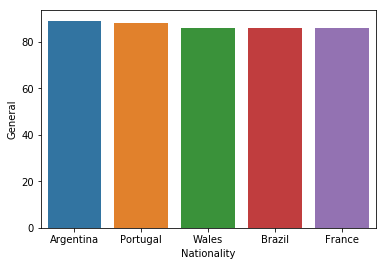

In [24]:
# Top 5 control de indicadores generales ('HeadingAccuracy', 'Dribbling', 'Curve','BallControl') por nacionalidad
general = df.sort_values('General', ascending = False)[['Nationality','General']].head(5) 
sns.barplot(x = 'Nationality', y = 'General', data = general,estimator=median,capsize=.2)
print(general )

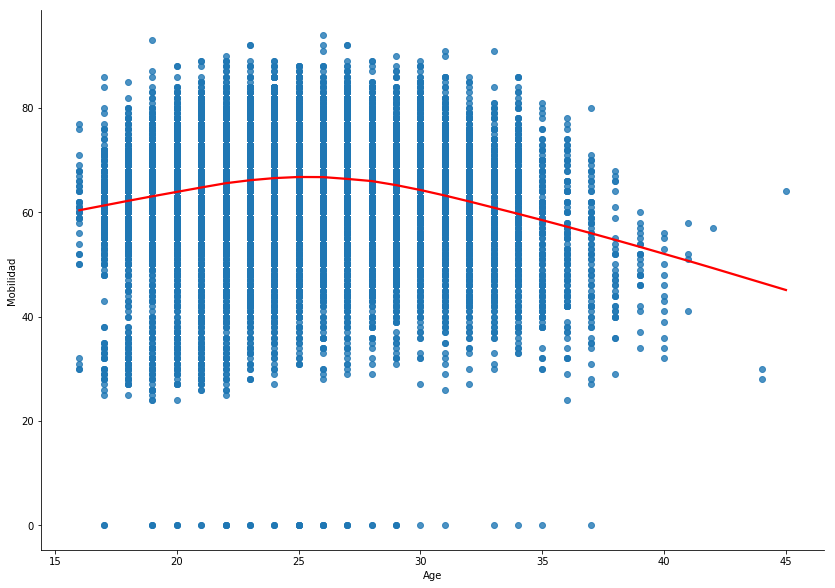

In [25]:
# Obtener la mobilidad (Agilidad) por edad del jugador
sns.lmplot(data = df, x = 'Age', y = 'Mobilidad',lowess=True, line_kws={'color':'red'},height=8.27, aspect=11.7/8.27)

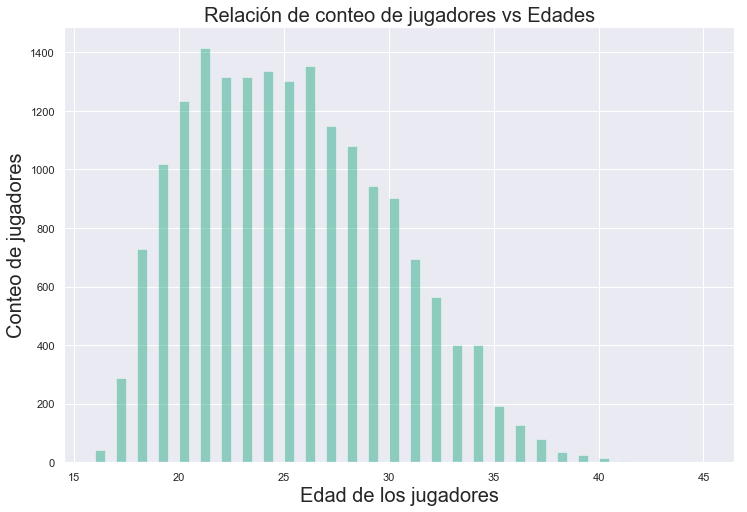

In [26]:
# Conteo de jugadores por rangos de edad
sns.set(palette = "colorblind")
x = df['Age']
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Edad de los jugadores", fontsize = 20)
ax.set_ylabel(ylabel = 'Conteo de jugadores', fontsize = 20)
ax.set_title(label = 'Relación de conteo de jugadores vs Edades', fontsize = 20)
plt.show()

In [28]:
# Los jugadores de mayor edad
print(df.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(10) )


                Name  Age                          Club        Nationality
4741        O. Pérez   45                       Pachuca             Mexico
17726      T. Warner   44            Accrington Stanley  Trinidad & Tobago
18183  K. Pilkington   44              Cambridge United            England
10545    S. Narazaki   42                Nagoya Grampus              Japan
4228        B. Nivet   41                  ESTAC Troyes             France
15426       M. Tyler   41           Peterborough United            England
7225        C. Muñoz   41  CD Universidad de Concepción          Argentina
12192   H. Sulaimani   41                     Ohod Club       Saudi Arabia
16596   A. Al Basisi   40                     Ohod Club       Saudi Arabia
41         G. Buffon   40           Paris Saint-Germain              Italy


In [29]:
# Obtener el top 5 de las nacionalidades mejor pagadas
df.groupby(['Nationality']).sum()[['Wage']].sort_values('Wage',ascending = False).head(5)

,Wage
Nationality,
Spain,17498000.0
England,16526000.0
Brazil,14703000.0
France,12845000.0
Germany,11548000.0
